## Data Generation

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)

simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

# Preparing data

mean = simulated_separableish_features.mean(axis = 0)
std = simulated_separableish_features.std(axis = 0)

simulated_separableish_features = (simulated_separableish_features - mean) / std

## Data Visualisation 

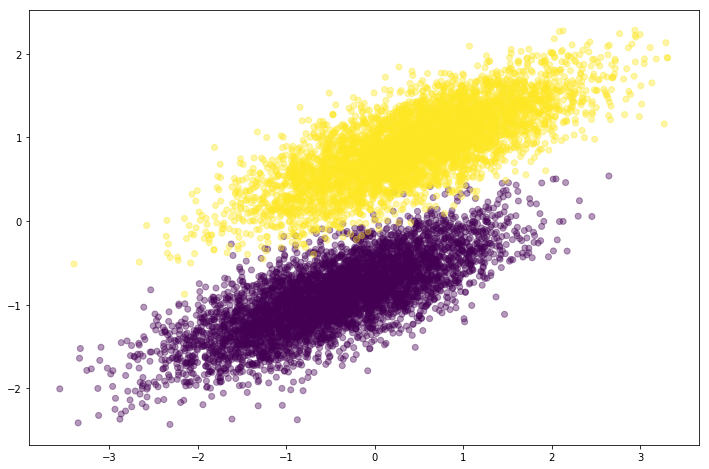

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

## Sigmoid Function

In [19]:
def sigmoid(x):
    '''1 / (1 + e^(-x))'''
    
    return 1 / (1 + np.exp(-x))

## Log-Likelihood

In [20]:
def log_likelihood(features, target, weights):
    '''
        U = sum(target * weights_tr * features - log(1 + exp(weights_tr * features)))
    '''
    
    scores = np.dot(features, weights)
    
    return np.sum(target * scores - np.log(1 + np.exp(scores)))

## Gradient of the Log-likelihood

In [21]:
def grad(features, target, predictions):
    '''
        grad(U) = features_tr * (target - predictions)
    '''
    
    diff = target - predictions
    
    return np.dot(features.T, diff)

## Logistic regression

In [22]:
def logistic_regression(features, target, num_steps, learning_rate):
    # add free coefficients as 1
    features = np.hstack(
        (np.ones((features.shape[0], 1)),features))
    
    # initialize weights
    weights = np.zeros(features.shape[1])
    
    # iterative process
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        gradient = grad(features, target, predictions)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [23]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 100000, learning_rate = 5e-5)

-5805.44152846
-152.141471208
-144.397203058
-142.259553458
-141.441125241
-141.079896348
-140.907512288
-140.821212172
-140.776634285
-140.753112234


## Check results on data

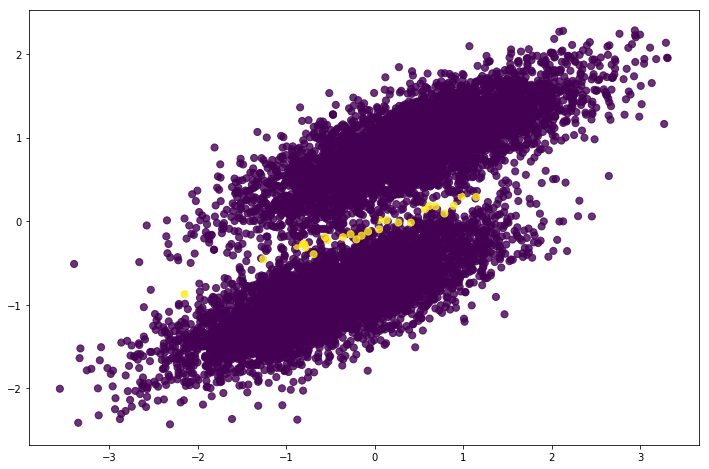

In [24]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)